In [83]:
import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.2.9  Python-3.10.6 torch-2.3.0+cpu CPU (Intel Core(TM) i5-4460  3.20GHz)
Setup complete  (4 CPUs, 15.9 GB RAM, 493.5/931.5 GB disk)


In [84]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO

In [3]:
# Change list of classes to dict

classes = ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'CA-te d-Ivoire', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo -Congo-Brazzaville-', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia -Czech Republic-', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini -fmr- -Swaziland--', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar -formerly Burma-', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Korea', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestine State', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Korea', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']
classes_dict = {}
for i, class_name in enumerate(classes):
    classes_dict[class_name] = i

print(classes_dict)


{'Afghanistan': 0, 'Albania': 1, 'Algeria': 2, 'Andorra': 3, 'Angola': 4, 'Antigua and Barbuda': 5, 'Argentina': 6, 'Armenia': 7, 'Australia': 8, 'Austria': 9, 'Azerbaijan': 10, 'Bahamas': 11, 'Bahrain': 12, 'Bangladesh': 13, 'Barbados': 14, 'Belarus': 15, 'Belgium': 16, 'Belize': 17, 'Benin': 18, 'Bhutan': 19, 'Bolivia': 20, 'Bosnia and Herzegovina': 21, 'Botswana': 22, 'Brazil': 23, 'Brunei': 24, 'Bulgaria': 25, 'Burkina Faso': 26, 'Burundi': 27, 'CA-te d-Ivoire': 28, 'Cabo Verde': 29, 'Cambodia': 30, 'Cameroon': 31, 'Canada': 32, 'Central African Republic': 33, 'Chad': 34, 'Chile': 35, 'China': 36, 'Colombia': 37, 'Comoros': 38, 'Congo -Congo-Brazzaville-': 39, 'Costa Rica': 40, 'Croatia': 41, 'Cuba': 42, 'Cyprus': 43, 'Czechia -Czech Republic-': 44, 'Democratic Republic of the Congo': 45, 'Denmark': 46, 'Djibouti': 47, 'Dominica': 48, 'Dominican Republic': 49, 'Ecuador': 50, 'Egypt': 51, 'El Salvador': 52, 'Equatorial Guinea': 53, 'Eritrea': 54, 'Estonia': 55, 'Eswatini -fmr- -Swaz

In [51]:
def find_country_by_id(id_num, class_dict):
    for country, value in class_dict.items():
        if value == id_num:
            return country
    return "Nie ma kraju o podanym numerze."

print(find_country_by_id(6, classes_dict))

Argentina


Check boxes on image

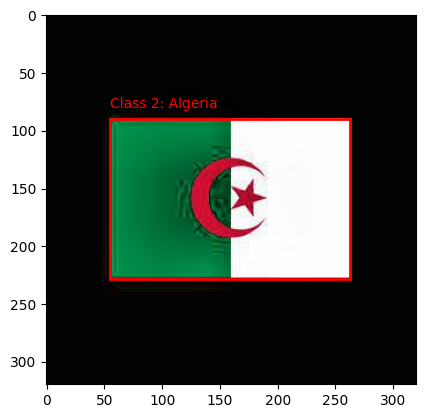

In [68]:
def draw_boxes_on_image(image_path, label_path, classes):
    image = Image.open(image_path)

    fig, ax = plt.subplots(1)
    ax.imshow(image)

    with open(label_path, 'r') as txt_file:
        for line in txt_file:
            values = line.strip().split(' ')
            class_id, x_center, y_center, width, height = map(float, values[0:5])

            # Transform yolo to image size
            image_width, image_height = image.size
            x_center *= image_width
            y_center *= image_height
            width *= image_width
            height *= image_height

            # Calculate coordinates of bbox
            x_min = x_center - width / 2
            y_min = y_center - height / 2
            rect_width = width
            rect_height = height

            # Draw rectangle
            rect = plt.Rectangle((x_min, y_min), rect_width, rect_height, linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)

            # Add class label
            for flag, id in classes.items():
                if id == class_id:
                    class_flag = flag

            plt.text(x_min, y_min - 10, f'Class {int(class_id)}: {class_flag}', color='red')

    plt.show()

image_filepath = 'E:/pycharmik/geotastic_with_AI/datasets/test/images/3_g0_208_jpg.rf.141e39330449c85ad7275a6d1915289e.jpg'
label_filepath = 'E:/pycharmik/geotastic_with_AI/datasets/test/labels/3_g0_208_jpg.rf.141e39330449c85ad7275a6d1915289e.txt'

draw_boxes_on_image(image_filepath, label_filepath, classes_dict)


Split the dataset into train-valid-test 

In [69]:
test_images = [os.path.join('datasets/test/images', x) for x in os.listdir('datasets/test/images')]
test_annotations = [os.path.join('datasets/test/labels', x) for x in os.listdir('datasets/test/labels')]

train_images = [os.path.join('datasets/train/images', x) for x in os.listdir('datasets/train/images')]
train_annotations = [os.path.join('datasets/train/labels', x) for x in os.listdir('datasets/train/labels')]

val_images = [os.path.join('datasets/valid/images', x) for x in os.listdir('datasets/valid/images')]
val_annotations =[os.path.join('datasets/valid/labels', x) for x in os.listdir('datasets/valid/labels')]


In [70]:
print(test_images[:5])
print(test_annotations[:5])
print(test_images[-5:])
print(test_annotations[-5:])

['datasets/test/images\\100_g0_144_jpg.rf.ace30659400414b2a743d2de2e50470f.jpg', 'datasets/test/images\\100_g0_160_jpg.rf.492224ebc85885c5444959c5aea3cc9c.jpg', 'datasets/test/images\\100_g0_256_jpg.rf.cc2ac55c81efa8304f8371a7bb6956ce.jpg', 'datasets/test/images\\100_g0_288_jpg.rf.3bd1e22ca1a820918ae6c6611c7e9acf.jpg', 'datasets/test/images\\100_g2_144_jpg.rf.5c0f6d32c8e0348c78a4c09ec2582e2b.jpg']
['datasets/test/labels\\100_g0_144_jpg.rf.ace30659400414b2a743d2de2e50470f.txt', 'datasets/test/labels\\100_g0_160_jpg.rf.492224ebc85885c5444959c5aea3cc9c.txt', 'datasets/test/labels\\100_g0_256_jpg.rf.cc2ac55c81efa8304f8371a7bb6956ce.txt', 'datasets/test/labels\\100_g0_288_jpg.rf.3bd1e22ca1a820918ae6c6611c7e9acf.txt', 'datasets/test/labels\\100_g2_144_jpg.rf.5c0f6d32c8e0348c78a4c09ec2582e2b.txt']
['datasets/test/images\\98_g0_64_jpg.rf.f853affcb76c3f90f07806df8a5e05d4.jpg', 'datasets/test/images\\98_g2_144_jpg.rf.f183052df998eebde6a668dde88c518c.jpg', 'datasets/test/images\\99_g0_240_jpg.rf.

In [71]:
print(len(train_images))
print(len(train_annotations))
print(len(val_images))
print(len(val_annotations))
print(len(test_images))
print(len(test_annotations))

14918
14918
1989
1989
497
497


Train dataset using yolov8

In [88]:
model = YOLO("yolov8n-cls.pt")
model.train(data="datasets/", epochs=50)

New https://pypi.org/project/ultralytics/8.2.10 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.9  Python-3.10.6 torch-2.3.0+cpu CPU (Intel Core(TM) i5-4460  3.20GHz)
engine\trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=datasets/, epochs=50, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=F

train: Scanning E:\pycharmik\geotastic_with_AI\datasets\train... 14918 images, 0 corrupt: 100%|██████████| 14918/14918 [00:00<?, ?it/s]
val: Scanning E:\pycharmik\geotastic_with_AI\datasets\val... 1989 images, 0 corrupt: 100%|██████████| 1989/1989 [00:00<?, ?it/s]

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)


TensorBoard: model graph visualization added 
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs\classify\train6
Starting training for 50 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:23<00:00,  2.71it/s]

                   all       0.55      0.822



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:22<00:00,  2.80it/s]

                   all      0.917      0.991



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:27<00:00,  2.30it/s]

                   all      0.941      0.995



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:30<00:00,  2.07it/s]

                   all      0.918      0.996



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:37<00:00,  1.67it/s]

                   all      0.938      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:29<00:00,  2.15it/s]

                   all      0.962      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:27<00:00,  2.30it/s]

                   all      0.962          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:27<00:00,  2.29it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:29<00:00,  2.12it/s]

                   all      0.971      0.999



      Epoch    GPU_mem       loss  Instances       Size


      10/50         0G     0.3906          6        224: 100%|██████████| 933/933 [10:05<00:00,  1.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:28<00:00,  2.20it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


      11/50         0G     0.3897          6        224: 100%|██████████| 933/933 [10:28<00:00,  1.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:31<00:00,  2.00it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      12/50         0G     0.3762          6        224: 100%|██████████| 933/933 [10:14<00:00,  1.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:29<00:00,  2.13it/s]

                   all      0.976      0.999



      Epoch    GPU_mem       loss  Instances       Size


      13/50         0G      0.357          6        224: 100%|██████████| 933/933 [13:47<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:51<00:00,  1.23it/s]

                   all      0.978          1



      Epoch    GPU_mem       loss  Instances       Size


      14/50         0G     0.3474          6        224: 100%|██████████| 933/933 [13:43<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:35<00:00,  1.76it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      15/50         0G     0.3475          6        224: 100%|██████████| 933/933 [11:05<00:00,  1.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:30<00:00,  2.10it/s]

                   all       0.98      0.999



      Epoch    GPU_mem       loss  Instances       Size


      16/50         0G     0.3348          6        224: 100%|██████████| 933/933 [10:58<00:00,  1.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:30<00:00,  2.07it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


      17/50         0G     0.3189          6        224: 100%|██████████| 933/933 [11:40<00:00,  1.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:28<00:00,  2.24it/s]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


      18/50         0G     0.3059          6        224: 100%|██████████| 933/933 [10:26<00:00,  1.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:31<00:00,  1.99it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


      19/50         0G     0.2998          6        224: 100%|██████████| 933/933 [11:00<00:00,  1.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:30<00:00,  2.06it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


      20/50         0G     0.3007          6        224: 100%|██████████| 933/933 [10:33<00:00,  1.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:30<00:00,  2.09it/s]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


      21/50         0G     0.2839          6        224: 100%|██████████| 933/933 [10:40<00:00,  1.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:30<00:00,  2.07it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      22/50         0G     0.2693          6        224: 100%|██████████| 933/933 [10:38<00:00,  1.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:40<00:00,  1.55it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


      23/50         0G     0.2673          6        224: 100%|██████████| 933/933 [13:03<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:43<00:00,  1.43it/s]

                   all      0.988          1



      Epoch    GPU_mem       loss  Instances       Size


      24/50         0G     0.2668          6        224: 100%|██████████| 933/933 [12:08<00:00,  1.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:29<00:00,  2.14it/s]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


      25/50         0G     0.2641          6        224: 100%|██████████| 933/933 [10:08<00:00,  1.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:25<00:00,  2.48it/s]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


      26/50         0G     0.2486          6        224: 100%|██████████| 933/933 [08:37<00:00,  1.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:25<00:00,  2.48it/s]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


      27/50         0G     0.2491          6        224: 100%|██████████| 933/933 [08:34<00:00,  1.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:25<00:00,  2.50it/s]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


      28/50         0G     0.2513          6        224: 100%|██████████| 933/933 [10:46<00:00,  1.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:36<00:00,  1.70it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


      29/50         0G     0.2229          6        224: 100%|██████████| 933/933 [12:10<00:00,  1.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:31<00:00,  1.99it/s]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


      30/50         0G     0.2252          6        224: 100%|██████████| 933/933 [09:58<00:00,  1.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:27<00:00,  2.30it/s]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


      31/50         0G     0.2227          6        224: 100%|██████████| 933/933 [09:46<00:00,  1.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:30<00:00,  2.05it/s]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


      32/50         0G     0.2105          6        224: 100%|██████████| 933/933 [10:36<00:00,  1.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:38<00:00,  1.63it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


      33/50         0G     0.2135          6        224: 100%|██████████| 933/933 [12:04<00:00,  1.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:40<00:00,  1.57it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


      34/50         0G     0.2217          6        224: 100%|██████████| 933/933 [11:49<00:00,  1.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:35<00:00,  1.76it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


      35/50         0G     0.2069          6        224: 100%|██████████| 933/933 [11:57<00:00,  1.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:38<00:00,  1.63it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


      36/50         0G     0.2001          6        224: 100%|██████████| 933/933 [13:17<00:00,  1.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:33<00:00,  1.86it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


      37/50         0G     0.1988          6        224: 100%|██████████| 933/933 [12:00<00:00,  1.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:33<00:00,  1.90it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


      38/50         0G     0.1894          6        224: 100%|██████████| 933/933 [11:11<00:00,  1.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:29<00:00,  2.12it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


      39/50         0G     0.1819          6        224: 100%|██████████| 933/933 [11:03<00:00,  1.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:30<00:00,  2.04it/s]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


      40/50         0G     0.1884          6        224: 100%|██████████| 933/933 [12:17<00:00,  1.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:36<00:00,  1.72it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


      41/50         0G     0.1813          6        224: 100%|██████████| 933/933 [13:11<00:00,  1.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:34<00:00,  1.82it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


      42/50         0G     0.1795          6        224: 100%|██████████| 933/933 [13:17<00:00,  1.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:34<00:00,  1.84it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


      43/50         0G     0.1783          6        224: 100%|██████████| 933/933 [12:50<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:33<00:00,  1.88it/s]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


      44/50         0G     0.1789          6        224: 100%|██████████| 933/933 [13:26<00:00,  1.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:46<00:00,  1.35it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


      45/50         0G     0.1731          6        224: 100%|██████████| 933/933 [12:28<00:00,  1.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:32<00:00,  1.95it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


      46/50         0G     0.1672          6        224: 100%|██████████| 933/933 [11:53<00:00,  1.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:35<00:00,  1.75it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


      47/50         0G     0.1582          6        224: 100%|██████████| 933/933 [12:48<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:36<00:00,  1.75it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


      48/50         0G     0.1605          6        224: 100%|██████████| 933/933 [12:03<00:00,  1.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:43<00:00,  1.46it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


      49/50         0G     0.1625          6        224: 100%|██████████| 933/933 [12:25<00:00,  1.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:34<00:00,  1.83it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


      50/50         0G     0.1544          6        224: 100%|██████████| 933/933 [12:51<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:38<00:00,  1.65it/s]

                   all      0.994          1



50 epochs completed in 9.845 hours.
Optimizer stripped from runs\classify\train6\weights\last.pt, 3.5MB
Optimizer stripped from runs\classify\train6\weights\best.pt, 3.5MB

Validating runs\classify\train6\weights\best.pt...
Ultralytics YOLOv8.2.9  Python-3.10.6 torch-2.3.0+cpu CPU (Intel Core(TM) i5-4460  3.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1684675 parameters, 0 gradients, 3.5 GFLOPs
train: E:\pycharmik\geotastic_with_AI\datasets\train... found 14918 images in 195 classes  
val: E:\pycharmik\geotastic_with_AI\datasets\val... found 1989 images in 195 classes  
test: E:\pycharmik\geotastic_with_AI\datasets\test... found 514 images in 195 classes  


               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:30<00:00,  2.06it/s]


                   all      0.994          1
Speed: 0.0ms preprocess, 10.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\train6
Results saved to runs\classify\train6


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000021B76F09BA0>
curves: []
curves_results: []
fitness: 0.9972347915172577
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9944695830345154, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9972347915172577}
save_dir: WindowsPath('runs/classify/train6')
speed: {'preprocess': 0.0015057889344765349, 'inference': 10.795094248875714, 'loss': 0.0, 'postprocess': 0.0}
task: 'classify'
top1: 0.9944695830345154
top5: 1.0